In [39]:
import pandas as pd
import numpy as np

loc = "MERGED2016_17_PP.csv"

dfraw = pd.read_csv(loc)

C:\Users\isaac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
dfraw.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_4_LOANNOPELL,C150_L4_LOANNOPELL,D150_L4_LOANNOPELL,C150_4_NOLOANNOPELL,D150_4_NOLOANNOPELL,C150_L4_NOLOANNOPELL,D150_L4_NOLOANNOPELL,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,195.0,NaN,NaN,0.3258,89.0,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,229.0,NaN,NaN,0.5603,630.0,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,0.5000,2.0,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,135.0,NaN,NaN,0.5606,264.0,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,55.0,NaN,NaN,0.2277,101.0,NaN,NaN,NaN,NaN,NaN


### There are a ridiculous number of columns here, so lets grab some interesting variables and put them in their own dataframe

In [41]:
df = dfraw[["C100_4", "NPT4_PUB"]]
df.columns = ["completion", "public_school_tuition"]

In [42]:
df.head()

,completion,public_school_tuition
0,0.0643,15567.0
1,0.3018,16475.0
2,0.1429,NaN
3,0.1533,19423.0
4,0.0725,15037.0


In [43]:
df.corr()

,completion,public_school_tuition
completion,1.000000,0.515731
public_school_tuition,0.515731,1.000000


### Joy suggested that INEXPFTE (instructional expenditures per full-time student) and ADM_RATE (admissions rate) are correlated with completion rates, so lets add those to the dataframe and run the correlation

In [44]:
df["expenditures_per_student"] = dfraw["INEXPFTE"]
df["adm_rate"] = dfraw["ADM_RATE"]

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### I suggest looking at pell_grant_rate, and loan_principal. The intuition is that if you qualify for pell you're from a disadvantaged background and less likely to graduate

In [45]:
df["pell_grant_rate"]=dfraw["PCTPELL"]

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df.head()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate
0,0.0643,15567.0,5888.0,0.8738,0.7039
1,0.3018,16475.0,17055.0,0.5814,0.3525
2,0.1429,NaN,5417.0,NaN,0.6971
3,0.1533,19423.0,10558.0,0.7628,0.2949
4,0.0725,15037.0,7889.0,0.4590,0.7815


In [47]:
df.corr()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate
completion,1.000000,0.515731,0.459406,-0.306999,-0.569687
public_school_tuition,0.515731,1.000000,0.292337,0.062488,-0.072446
expenditures_per_student,0.459406,0.292337,1.000000,-0.253013,-0.282385
adm_rate,-0.306999,0.062488,-0.253013,1.000000,0.145925
pell_grant_rate,-0.569687,-0.072446,-0.282385,0.145925,1.000000


### These results are promising so far, let's remove NaN observations and run a regression

In [26]:
df.dropna(inplace = True)
df.head()

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Completion,Public_School_Tuition,Expenditures_Per_Student,Adm_Rate
0,0.0643,15567.0,5888.0,0.8738
1,0.3018,16475.0,17055.0,0.5814
3,0.1533,19423.0,10558.0,0.7628
4,0.0725,15037.0,7889.0,0.4590
5,0.4385,21676.0,10478.0,0.5259


### Next let's run a regression and see what the results are

In [27]:
import statsmodels.formula.api as sm

#result = sm.ols(formula='waste ~ year',data=df).fit()
#result.summary()

reg1 = sm.ols(formula='Completion~ public_school_tuition + expenditures_per_student + adm_rate', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Completion   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1020.
Date:                Fri, 19 Oct 2018   Prob (F-statistic):          6.03e-222
Time:                        21:52:46   Log-Likelihood:                 341.40
No. Observations:                 543   AIC:                            -676.8
Df Residuals:                     540   BIC:                            -663.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Public_School_Tuition     1.774e-05   1.27e-06     13.919      0.000    1.52e-05    2.02e-05
Expenditures_Per_Student  1.428e-05   1.21e-06     11.781      0.000    1.19e-05    1.67e-05
Adm_Rate                    -0.1490      0.022     -6.691      0.000      -0.193      -0.105
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.857
Skew:                           0.256   Prob(JB):                       0.0119
Kurtosis:                       3.360   Cond. No.                     7.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
dfraw.shape

(7175, 1847)

### Viewing the dataframe for price of tuition and completion rate, there are a number of NaN observations

In [4]:
df[["NPT4_PUB", "C100_4"]]

,NPT4_PUB,C100_4
0,15567.0,0.0643
1,16475.0,0.3018
2,NaN,0.1429
3,19423.0,0.1533
4,15037.0,0.0725
5,21676.0,0.4385
6,9128.0,NaN
7,NaN,NaN
8,15053.0,0.0720
9,21984.0,0.4682


### Remove NaN observations from our variables of interest

In [6]:
df.dropna(subset=["C100_4", "NPT4_PUB"], inplace = True)
df[["C100_4", "NPT4_PUB"]]

,C100_4,NPT4_PUB
0,0.0643,15567.0
1,0.3018,16475.0
3,0.1533,19423.0
4,0.0725,15037.0
5,0.4385,21676.0
8,0.0720,15053.0
9,0.4682,21984.0
27,0.1445,17664.0
33,0.1563,13227.0
38,0.2847,18000.0


In [43]:
dfx = df[["NPT4_PUB"]]

In [44]:
dfx

,NPT4_PUB
0,15567.0
1,16475.0
3,19423.0
4,15037.0
5,21676.0
8,15053.0
9,21984.0
27,17664.0
33,13227.0
38,18000.0


In [3]:
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as pltx
import sklearn

In [45]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
lm.fit(dfx, df.C100_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
print('Estimated intercept coefficient: ',lm.intercept_)

Estimated intercept coefficient:  -0.022357980400230293


In [83]:
print('p-values:',get_params(deep))

NameError: name 'get_params' is not defined

In [52]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 1


In [53]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ["features", "estimated Coefficients"])

,features,estimated Coefficients
0,UNITID,0.000021


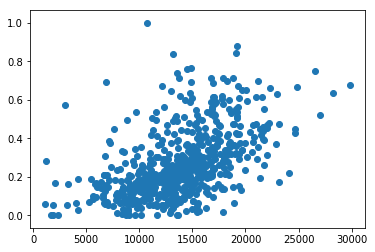

In [61]:
plt.scatter(dfx.NPT4_PUB, df.C100_4)
plt.show()

In [72]:
lm.predict(dfx)[0:5]

array([0.3055459 , 0.32467205, 0.38676883, 0.29438196, 0.43422611])

<function matplotlib.pyplot.show>

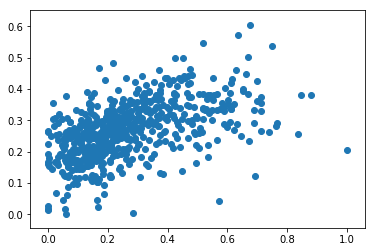

In [73]:
plt.scatter(df.C100_4, lm.predict(dfx))
plt.show

In [ ]:
# mseFULL - Mean of square errors for the full regression